# Data Wrangling Project
 
 
## Introduction
### I will wrangle the data of twitter account "WeRateDog" and then analys it and make visualizations.

In [443]:
#first import the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import requests as rq
import tweepy
import json

import os

# Gathering Data

## 1) The WeRateDogs Twitter archive

In [444]:
#read the csv file using pandas
twitterArchive_df  = pd.read_csv('twitter-archive-enhanced.csv')

In [445]:
#check the file with .head()
twitterArchive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


## 2) The tweet image predictions

In [446]:
#download and read image predictions

#first download
#assign the url in variable
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#using response library
response = rq.get(url)

#download it as image-predictions.tsv
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

In [447]:
#now we can read it using pandas
image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [448]:
#check the file with .head()
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## 3) Twitter API from Json

In [449]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'

#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    #for tweet_id in tweet_ids:
        #count += 1
        #print(str(count) + ": " + str(tweet_id))
        #try:
            #tweet = api.get_status(tweet_id, tweet_mode='extended')
            #print("Success")
            #json.dump(tweet._json, outfile)
            #outfile.write('\n')
        #except tweepy.TweepError as e:
            #print("Fail")
            #fails_dict[tweet_id] = e
            #pass
#end = timer()
#print(end - start)
#print(fails_dict)

In [450]:
#I dont have twitter account so I took the data from the project page.
#now I will create dataframe using pandas with tweet_id, retweet_count and facorite_count.
df_list = []
with open('tweet-json.txt') as file:
    for line in file:
        tweet = json.loads(line)
        
        df_list.append({
            'tweet_id': tweet['id'],
            'retweet_count': tweet['retweet_count'],
            'favorite_count': tweet['favorite_count']
        })
tweet_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [451]:
#check the data
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# Assessing Data

## twitterArchive_df

In [452]:
twitterArchive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [453]:
twitterArchive_df.sample(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
109,871166179821445120,NaN,NaN,2017-06-04 00:46:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Dawn. She's just checki...,8.410770e+17,4.196984e+09,2017-03-13 00:02:39 +0000,https://twitter.com/dog_rates/status/841077006...,12,10,Dawn,None,None,None,None
627,794983741416415232,NaN,NaN,2016-11-05 19:24:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rizzy. She smiles a lot...,7.895309e+17,4.196984e+09,2016-10-21 18:16:44 +0000,https://twitter.com/dog_rates/status/789530877...,12,10,Rizzy,None,None,None,None
894,759197388317847553,NaN,NaN,2016-07-30 01:22:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Luna. She's just heckin precious af I ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759197388...,12,10,Luna,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [454]:
#check if we have duplicated IDs in twitterArchive_df
sum(twitterArchive_df["tweet_id"].duplicated())

0

In [455]:
#check if there is duplicated text
sum(twitterArchive_df["text"].duplicated())

0

In [456]:
#check the used sources
twitterArchive_df['source'].value_counts()
#the source is not readable we need to fix it

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [457]:
twitterArchive_df['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1    2
https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/683391852557561860/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_r

In [458]:
#check the most rating
twitterArchive_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [459]:
twitterArchive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [460]:
twitterArchive_df['name'].value_counts()

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Dante        1
Chuq         1
Cannon       1
Ace          1
Aja          1
Name: name, Length: 957, dtype: int64

In [461]:
#check the number of doggo
twitterArchive_df['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [462]:
#check the number of floofer
twitterArchive_df['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [463]:
#check the number of pupper
twitterArchive_df['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [464]:
#check the number of puppo
twitterArchive_df['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

# image_predictions_df

In [465]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [466]:
image_predictions_df.sample(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1680,813800681631023104,https://pbs.twimg.com/media/C0szZh_XUAAm9je.jpg,1,malamute,0.501159,True,Siberian_husky,0.228792,True,Eskimo_dog,0.200388,True
867,697575480820686848,https://pbs.twimg.com/media/Ca5JMvMUsAAGMll.jpg,1,Siamese_cat,0.256698,False,whippet,0.119805,True,bull_mastiff,0.102595,True
531,676821958043033607,https://pbs.twimg.com/media/CWSN-vaXAAA8Ehr.jpg,2,Great_Pyrenees,0.869804,True,kuvasz,0.079814,True,standard_poodle,0.013263,True
1534,790277117346975746,https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg,1,Labrador_retriever,0.427742,True,Great_Dane,0.190503,True,curly-coated_retriever,0.146427,True


In [467]:
#check if we have duplicated IDs in image_predictions_df
sum(image_predictions_df["tweet_id"].duplicated())

0

In [468]:
#check if there is duplicated url
sum(image_predictions_df["jpg_url"].duplicated())

66

In [469]:
image_predictions_df['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [470]:
image_predictions_df['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
hare                    1
rain_barrel             1
rapeseed                1
tailed_frog             1
teapot                  1
Name: p1, Length: 378, dtype: int64

In [471]:
image_predictions_df['p1_conf'].value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
           ..
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [472]:
image_predictions_df['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [473]:
image_predictions_df['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
snail                   1
crib                    1
soccer_ball             1
goose                   1
common_newt             1
Name: p2, Length: 405, dtype: int64

In [474]:
image_predictions_df['p2_conf'].value_counts()

0.069362    3
0.027907    2
0.193654    2
0.271929    2
0.003143    2
           ..
0.138331    1
0.254884    1
0.090644    1
0.219323    1
0.016301    1
Name: p2_conf, Length: 2004, dtype: int64

In [475]:
image_predictions_df['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [476]:
image_predictions_df['p3'].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
buckeye                1
goose                  1
parallel_bars          1
snail                  1
chest                  1
Name: p3, Length: 408, dtype: int64

In [477]:
image_predictions_df['p3_conf'].value_counts()

0.094759    2
0.035711    2
0.000428    2
0.044660    2
0.162084    2
           ..
0.024007    1
0.132820    1
0.002099    1
0.083643    1
0.033835    1
Name: p3_conf, Length: 2006, dtype: int64

In [478]:
image_predictions_df['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

# tweet_df

In [479]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [480]:
tweet_df.sample(4)

,tweet_id,retweet_count,favorite_count
556,803380650405482500,2169,8601
419,822163064745328640,5571,0
1733,679729593985699840,937,2367
1627,684567543613382656,1418,3312


In [481]:
#check if we have duplicated IDs in tweet_df
sum(tweet_df["tweet_id"].duplicated())

0

In [482]:
tweet_df['favorite_count'].value_counts()

0        179
610        3
345        3
2918       3
1691       3
        ... 
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [483]:
tweet_df['retweet_count'].value_counts()

1972     5
3652     5
83       5
146      4
61       4
        ..
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

# Tidness Issues

### 1- tweet_df and image_predictions_df should be merged with twitterArchive_df
### 2- the coulmns puppo , pupper, floofer and doggo should be merged to be one column

# Quality Issues

### 1- tweet_id is integer instead of object.
### 2- converte timestamp to date type
### 3- both time and date are in one column (timestamp)
### 4- the columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id should be string.
### 5- source column is not readable
### 6- remove the duplicated rows from jpg_url column
### 7- the coulmn 'name' have NAN values that assigned as None.
### 8- drop the columns that won't be used for analysis.

# Cleaning data

In [484]:
#first thing I need to make copy of every data set
twitterArchive_clean = twitterArchive_df.copy()
image_predictions_clean = image_predictions_df.copy()
tweet_clean = tweet_df.copy()

## Tidness Issues


## 1- tweet_df and image_predictions_df should be merged with twitterArchive_df
### Define: merge tweet_clean and image_predictions_clean with twitterArchive_clean

In [485]:
#first add image_predictions_clean
twitterArchive_clean = pd.merge(left = twitterArchive_clean, right = image_predictions_clean,
                                left_on = 'tweet_id',right_on = 'tweet_id', how = 'inner')

In [486]:
#then add the tweet_clean
twitterArchive_clean = twitterArchive_clean.merge(tweet_clean, on= 'tweet_id', how= 'inner')

In [487]:
#check if we have all the columns right with .info()
twitterArchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

## 2- the coulmns puppo , pupper, floofer and doggo should be merged to be one column
### define: merge all columns in one new column called "dog Stage"

In [488]:
twitterArchive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1753
1,None,None,None,puppo,23
2,None,None,pupper,None,210
3,None,floofer,None,None,7
4,doggo,None,None,None,67
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,11
7,doggo,floofer,None,None,1


In [489]:
#Some dogs has multiple stages, will concatenate them.

twitterArchive_clean.loc[twitterArchive_clean.doggo == 'None', 'doggo'] = ''
twitterArchive_clean.loc[twitterArchive_clean.floofer == 'None', 'floofer'] = ''
twitterArchive_clean.loc[twitterArchive_clean.pupper == 'None', 'pupper'] = ''
twitterArchive_clean.loc[twitterArchive_clean.puppo == 'None', 'puppo'] = ''

twitterArchive_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1753
1,,,,puppo,23
2,,,pupper,,210
3,,floofer,,,7
4,doggo,,,,67
5,doggo,,,puppo,1
6,doggo,,pupper,,11
7,doggo,floofer,,,1


In [490]:
twitterArchive_clean['Stage'] = (twitterArchive_clean.doggo + twitterArchive_clean.floofer 
                                 + twitterArchive_clean.pupper + twitterArchive_clean.puppo)
twitterArchive_clean.loc[twitterArchive_clean.Stage == 'doggopupper', 'Stage'] = 'doggo,pupper'
twitterArchive_clean.loc[twitterArchive_clean.Stage == 'doggopuppo', 'Stage'] = 'doggo,puppo'
twitterArchive_clean.loc[twitterArchive_clean.Stage == 'doggofloofer', 'Stage'] = 'doggo,floofer'

twitterArchive_clean.loc[twitterArchive_clean.Stage == '', 'Stage'] = 'None'

In [491]:
twitterArchive_clean.Stage.value_counts()

None             1753
pupper            210
doggo              67
puppo              23
doggo,pupper       11
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: Stage, dtype: int64

## Quality Issues

## 1-  tweet_id is integer instead of object.
### Define: tweet_id is integer and it should be changed to object

In [492]:
#change the type from int to object
twitterArchive_clean['tweet_id'] = twitterArchive_clean['tweet_id'].apply(str)

In [493]:
#check the type of tweet_id
twitterArchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

### 2- converte timestamp to date type
### define: change the time of column timestamp to date

In [494]:
#first I will change the type from object to date
twitterArchive_clean['timestamp'] = pd.to_datetime(twitterArchive_clean['timestamp'])
#check
twitterArchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2073 non-null   datetime64[ns, UTC]
 4   source                      2073 non-null   object             
 5   text                        2073 non-null   object             
 6   retweeted_status_id         79 non-null     float64            
 7   retweeted_status_user_id    79 non-null     float64            
 8   retweeted_status_timestamp  79 non-null     object             
 9   expanded_urls               2073 non-null   object             
 10  rating_numerator            2073 non-null   int64           

### 3- both time and date are in one column (timestamp) in twitter archive.
### define: seprate them into two columns

In [496]:
#now seprate date and time
twitterArchive_clean['date'] = twitterArchive_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
twitterArchive_clean['time'] = twitterArchive_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))
twitterArchive_clean['date'] = pd.to_datetime(twitterArchive_clean['date'])
twitterArchive_clean['time'] = pd.to_datetime(twitterArchive_clean['time'])

In [497]:
twitterArchive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,Stage,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.085851,False,banana,0.076110,False,8853,39467,None,2017-08-01,2020-08-14 16:23:00
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.090647,True,papillon,0.068957,True,6514,33819,None,2017-08-01,2020-08-14 00:17:00
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.078253,True,kelpie,0.031379,True,4328,25461,None,2017-07-31,2020-08-14 00:18:00
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.168086,True,spatula,0.040836,False,8964,42908,None,2017-07-30,2020-08-14 15:58:00
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,None,2017-07-29,2020-08-14 16:00:00


In [498]:
#check
twitterArchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2073 non-null   datetime64[ns, UTC]
 4   source                      2073 non-null   object             
 5   text                        2073 non-null   object             
 6   retweeted_status_id         79 non-null     float64            
 7   retweeted_status_user_id    79 non-null     float64            
 8   retweeted_status_timestamp  79 non-null     object             
 9   expanded_urls               2073 non-null   object             
 10  rating_numerator            2073 non-null   int64           

### 4- the columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id and retweeted_status_user_id should be object (string)
### define: change the to object

In [499]:
twitterArchive_clean['in_reply_to_status_id'] = twitterArchive_clean['in_reply_to_status_id'].astype(str) 
twitterArchive_clean['in_reply_to_user_id'] = twitterArchive_clean['in_reply_to_user_id'].astype(str) 
twitterArchive_clean['retweeted_status_id'] = twitterArchive_clean['retweeted_status_id'].astype(str) 
twitterArchive_clean['retweeted_status_user_id'] = twitterArchive_clean['retweeted_status_user_id'].astype(str) 

In [500]:
#check
twitterArchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   object             
 1   in_reply_to_status_id       2073 non-null   object             
 2   in_reply_to_user_id         2073 non-null   object             
 3   timestamp                   2073 non-null   datetime64[ns, UTC]
 4   source                      2073 non-null   object             
 5   text                        2073 non-null   object             
 6   retweeted_status_id         2073 non-null   object             
 7   retweeted_status_user_id    2073 non-null   object             
 8   retweeted_status_timestamp  79 non-null     object             
 9   expanded_urls               2073 non-null   object             
 10  rating_numerator            2073 non-null   int64           

### 5- source column is not readable
### define: fix it to be readable

In [501]:
twitterArchive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2032
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [502]:
import re
twitterArchive_clean['source'] = twitterArchive_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [503]:
#check
twitterArchive_clean['source'].value_counts()

Twitter for iPhone    2032
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

### 6- remove the duplicated rows from jpg_url column
### define: drop the duplicated rows from the columns

In [504]:
#check the duplicated before
sum(twitterArchive_clean['jpg_url'].duplicated())

65

In [505]:
#drop the duplicated
twitterArchive_clean = twitterArchive_clean.drop_duplicates(subset=['jpg_url'], keep='last')

In [506]:
#check after
sum(twitterArchive_clean['jpg_url'].duplicated())

0

### 7- the coulmn 'name' have NAN values that assigned as None.
### define: make them null.

In [507]:
#check before
twitterArchive_clean['name'].value_counts()

None       560
a           55
Charlie     11
Lucy        10
Cooper      10
          ... 
Cannon       1
Ace          1
Mark         1
Lambeau      1
Aja          1
Name: name, Length: 936, dtype: int64

In [508]:
#make all None String nulls
twitterArchive_clean['name'].replace('None', np.nan, inplace = True)

In [509]:
#check after
twitterArchive_clean['name'].value_counts()

a          55
Charlie    11
Lucy       10
Oliver     10
Cooper     10
           ..
Chuq        1
Cannon      1
Ace         1
Mark        1
Aja         1
Name: name, Length: 935, dtype: int64

### 8- drop the columns that won't be used for analysis.
### define: drop the columns (in_raply_to_status_id, in_reply_to_user_id).

In [510]:
twitterArchive_clean = twitterArchive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

In [511]:
#check
twitterArchive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2072
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2008 non-null   object             
 1   timestamp                   2008 non-null   datetime64[ns, UTC]
 2   source                      2008 non-null   object             
 3   text                        2008 non-null   object             
 4   retweeted_status_id         2008 non-null   object             
 5   retweeted_status_user_id    2008 non-null   object             
 6   retweeted_status_timestamp  14 non-null     object             
 7   expanded_urls               2008 non-null   object             
 8   rating_numerator            2008 non-null   int64              
 9   rating_denominator          2008 non-null   int64              
 10  name                        1448 non-null   object          

# Storing Data

In [512]:
#save the clean data as new csv file
twitterArchive_clean.to_csv('twitter_archive_master.csv')

In [531]:
#read it in new variable to analyze it
df = pd.read_csv('twitter_archive_master.csv')

In [532]:
df.head()

,Unnamed: 0,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,Stage,date,time
0,0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,...,0.085851,False,banana,0.076110,False,8853,39467,None,2017-08-01 00:00:00,2020-08-14 16:23:00
1,1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,0.090647,True,papillon,0.068957,True,6514,33819,None,2017-08-01 00:00:00,2020-08-14 00:17:00
2,2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,...,0.078253,True,kelpie,0.031379,True,4328,25461,None,2017-07-31 00:00:00,2020-08-14 00:18:00
3,3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,...,0.168086,True,spatula,0.040836,False,8964,42908,None,2017-07-30 00:00:00,2020-08-14 15:58:00
4,4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,...,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,None,2017-07-29 00:00:00,2020-08-14 16:00:00


In [533]:
twitterArchive_clean['date'] = pd.to_datetime(twitterArchive_clean['date'])
twitterArchive_clean['time'] = pd.to_datetime(twitterArchive_clean['time'])

In [534]:
df.describe()

,Unnamed: 0,tweet_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2008.000000,2.008000e+03,1.400000e+01,1.400000e+01,2008.000000,2008.000000,2008.000000,2008.000000,2.008000e+03,2.008000e+03,2008.000000,2008.000000
mean,1054.399900,7.363173e+17,8.022979e+17,5.624727e+16,12.277888,10.528386,1.202689,0.594557,1.341132e-01,6.017627e-02,2748.764442,8833.703685
std,598.499676,6.772918e+16,7.280851e+16,2.104580e+17,41.353212,7.295267,0.559604,0.272274,1.006481e-01,5.086572e-02,4663.351719,12193.020613
min,0.000000,6.660209e+17,6.675484e+17,7.832140e+05,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,0.000000
25%,546.750000,6.758663e+17,7.633143e+17,3.467385e+08,10.000000,10.000000,1.000000,0.362903,5.378615e-02,1.609288e-02,618.000000,1896.000000
50%,1068.500000,7.088401e+17,8.379587e+17,5.549343e+08,11.000000,10.000000,1.000000,0.588620,1.170625e-01,4.947920e-02,1342.000000,4072.000000
75%,1570.250000,7.888015e+17,8.482098e+17,1.124179e+09,12.000000,10.000000,1.000000,0.847560,1.949773e-01,9.157912e-02,3190.750000,11256.500000
max,2072.000000,8.924206e+17,8.768508e+17,7.874618e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


# Analyzing, and Visualizing Data

## what do tweets get more, retweets or favorates?

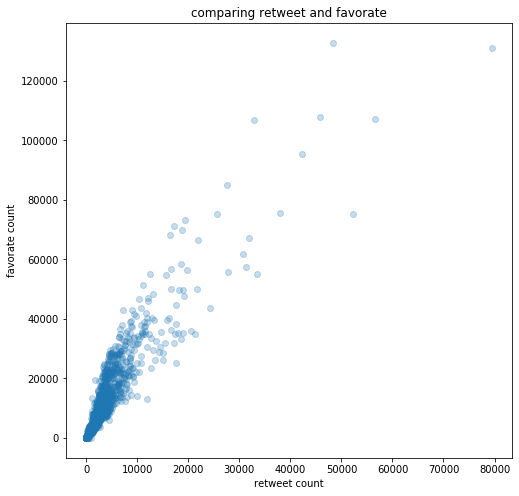

In [535]:
#compare the favorated count with retweed count
#firt make the plot
#change the size
plt.figure(figsize = (8, 8))
plt.scatter(df.retweet_count, df.favorite_count, alpha = 1/4);
#add x any y label
plt.title('comparing retweet and favorate')
plt.xlabel('retweet count')
plt.ylabel('favorate count')
plt.savefig('comparing_retweet_and_favorate.png', bbox_inches='tight');

### we can see that most of the time both retweed be arount 0-10000 and the number of favorate higher than retweets. and when retweed be high the number of favorate always be high as well.

## What is the most used source

In [536]:
df['source'].value_counts()

Twitter for iPhone    1967
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

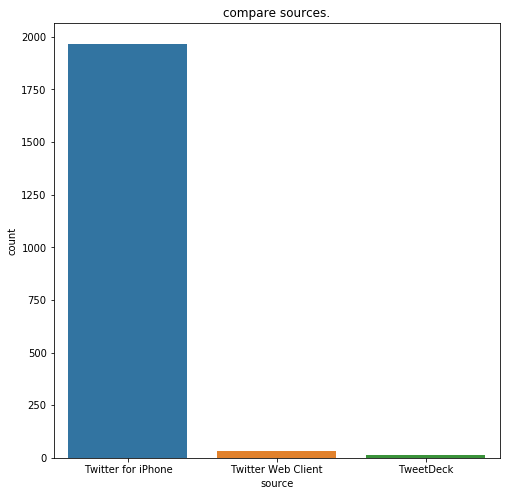

In [537]:
plt.figure(figsize = (8, 8))
sb.countplot(data = df, x = 'source')
plt.title('compare sources.')
plt.savefig('most_used_source.png', bbox_inches='tight');

### we can see that most sources are from the Official iPhone twitter app and there is a very few from web client and tweetDeck

## did the number of Favorite incressed over time?

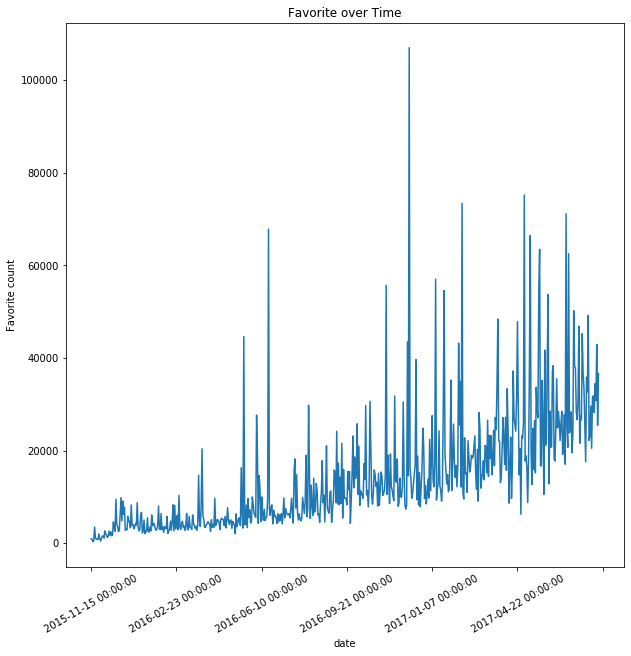

In [538]:
# Plot standardized ratings over time with ylim of 0-2
plt.figure(figsize = (10, 10))
df = df.sort_values('date')
df.groupby('date')['favorite_count'].mean().plot(kind='line')
plt.title('Favorite over Time')
plt.xlabel('date')
plt.ylabel('Favorite count')
plt.xticks(rotation = 30)
plt.show
plt.savefig('Favorite_over_Time.png', bbox_inches='tight');

## we can see that the average number of favorate does increase over time.

## does the stage effect on the number of favorate

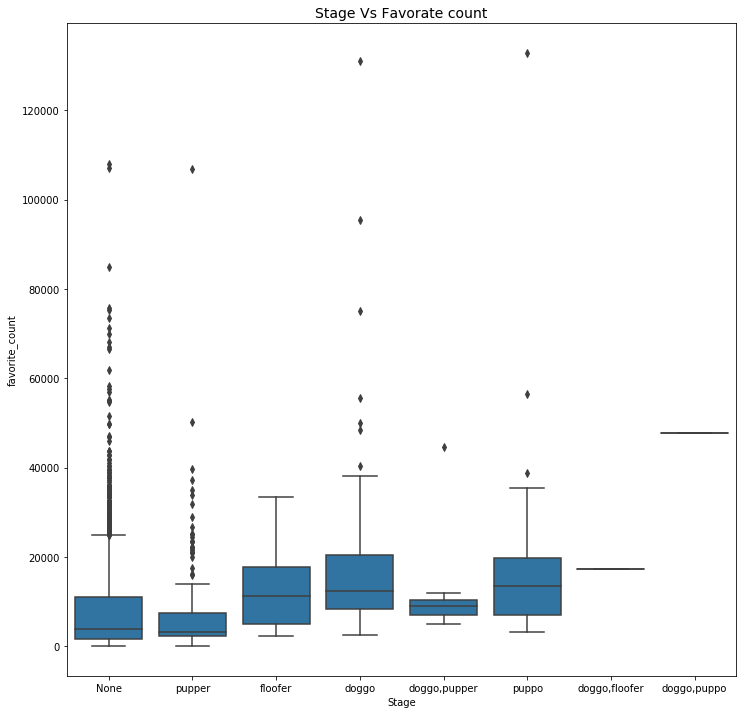

In [539]:
plt.figure(figsize=(12,12))
g = sb.boxplot(x='Stage',y='favorite_count',data= df, color = base_color)
g.axes.set_title('Stage Vs Favorate count', fontsize=14)
plt.savefig('StageVsFavorate_count', bbox_inches='tight');

## we can see that floofer, dogoo and puppo have close number of favorites while pupper have less favorites. and the tweet with the most number of favorite is for puppo.